In [ ]:
from PIL import Image

# Open the image
image = Image.open("/content/car.png")  

# Convert and save as JPG
image.convert("RGB").save("converted_image.jpg", "JPEG")


Original Image:


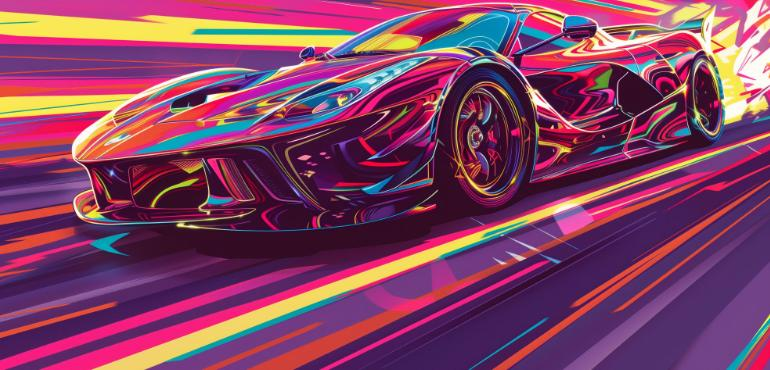

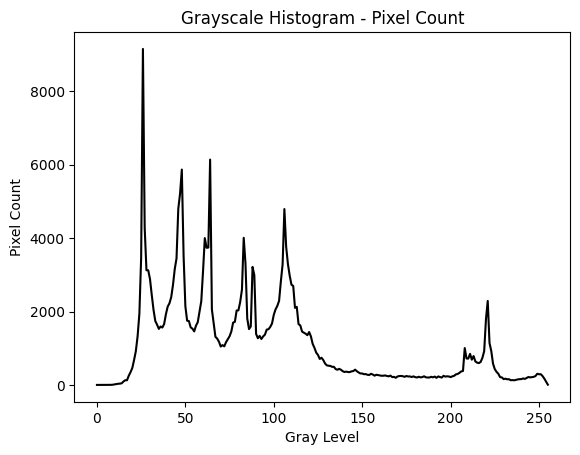

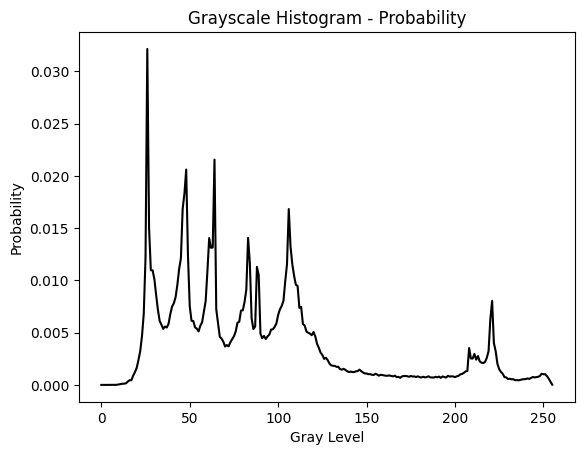

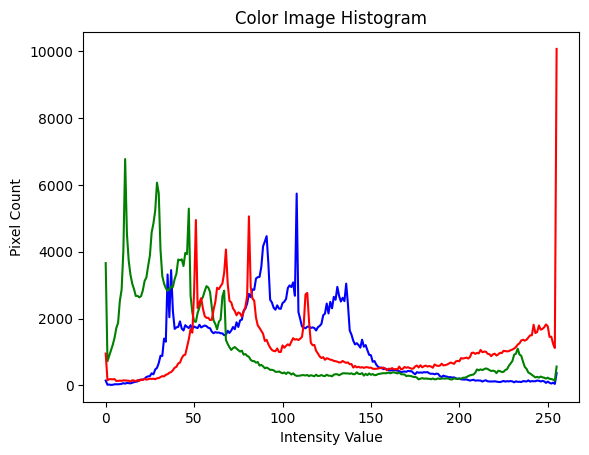

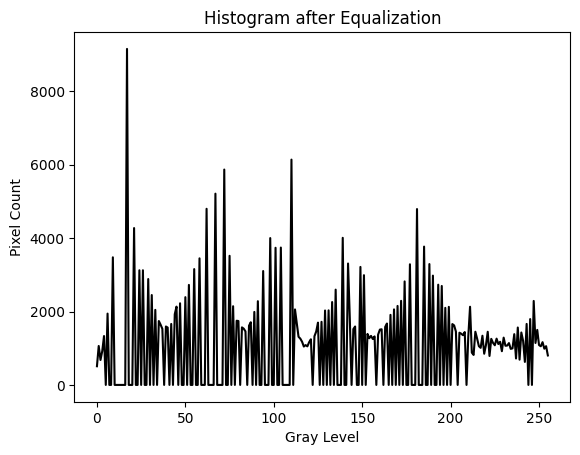

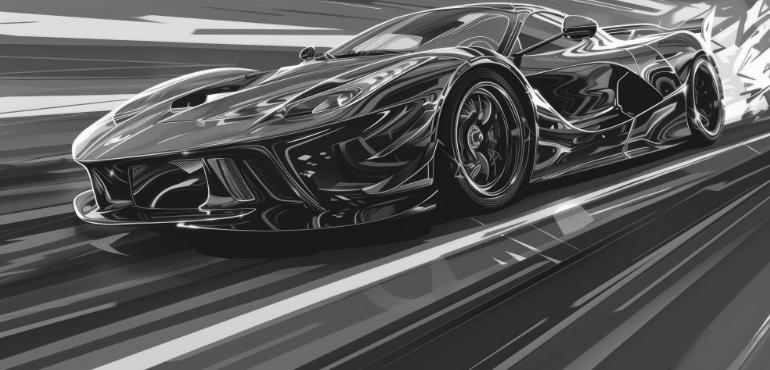

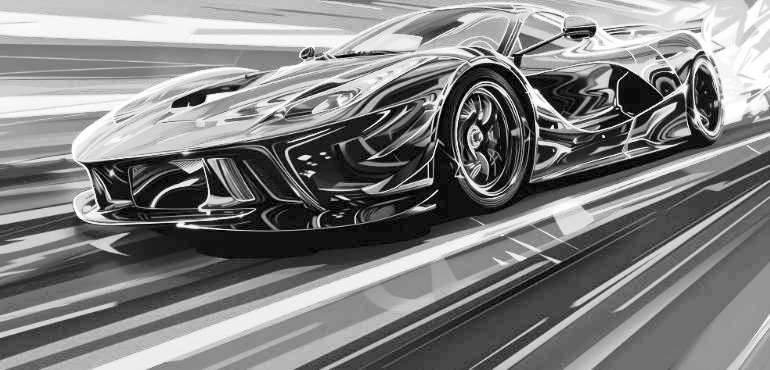

In [10]:
#task 1
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def plot_histogram(image, title, mode='count'):
    """
    Plots histogram for a given grayscale image.
    mode='count' plots pixel count, mode='prob' plots normalized probability.
    """
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    if mode == 'prob':
        hist /= hist.sum()
        ylabel = 'Probability'
    else:
        ylabel = 'Pixel Count'

    plt.figure()
    plt.plot(hist, color='black')
    plt.xlabel('Gray Level')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

def plot_color_histogram(image, title):
    """
    Plots histograms for each color channel (B, G, R) in a color image.
    """
    colors = ('blue', 'green', 'red')
    plt.figure()
    for i, color in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
    plt.xlabel('Intensity Value')
    plt.ylabel('Pixel Count')
    plt.title(title)
    plt.show()

def histogram_equalization(image):
    """
    Enhances contrast using histogram equalization.
    """
    return cv2.equalizeHist(image)

# Load the image
image_path = '/content/converted_image.jpg'
image = cv2.imread(image_path)

print("Original Image:")
cv2_imshow(image)

if image is None:
    print("Error: Could not read the image.")
else:
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute and plot histograms
    plot_histogram(gray_image, 'Grayscale Histogram - Pixel Count')
    plot_histogram(gray_image, 'Grayscale Histogram - Probability', mode='prob')
    plot_color_histogram(image, 'Color Image Histogram')

    # Histogram Equalization
    equalized_image = histogram_equalization(gray_image)
    plot_histogram(equalized_image, 'Histogram after Equalization')

    # Display original and equalized grayscale images in Colab
    cv2_imshow(gray_image)
    cv2_imshow(equalized_image)


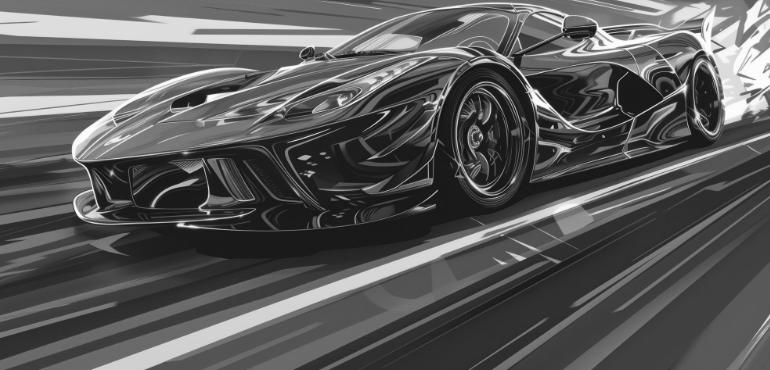

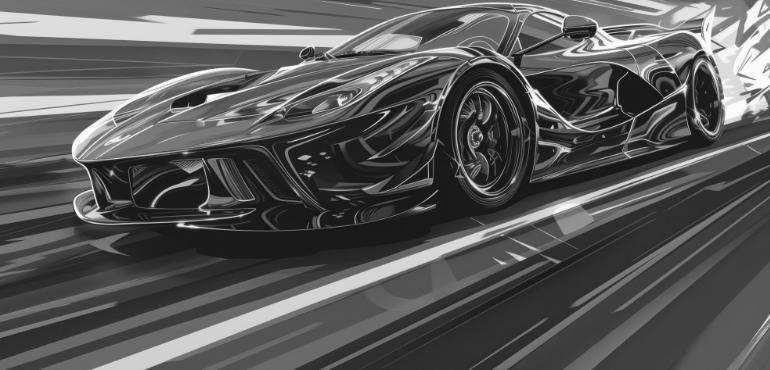

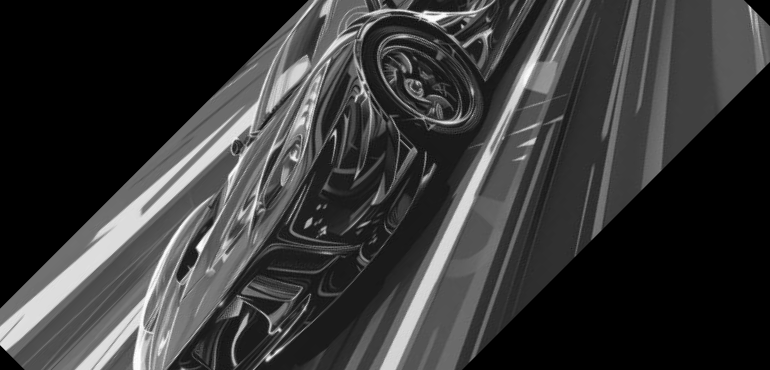

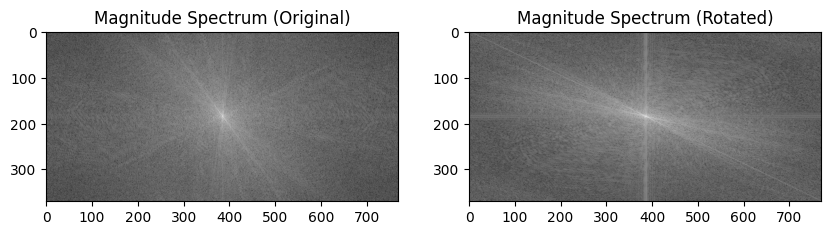

In [9]:
#task 2
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def compute_fft(image):
    """Computes the Fast Fourier Transform (FFT) and returns the magnitude spectrum."""
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)  # Log transform for better visualization
    return dft, dft_shift, magnitude_spectrum

def compute_ifft(dft_shift):
    """Computes the Inverse Fast Fourier Transform (IFFT) to reconstruct the original image."""
    dft_ishift = np.fft.ifftshift(dft_shift)
    img_reconstructed = np.fft.ifft2(dft_ishift)
    img_reconstructed = np.abs(img_reconstructed)
    return img_reconstructed

def rotate_image(image, angle):
    """Rotates an image by a given angle."""
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

# Load the grayscale image
image_path = '/content/converted_image.jpg'
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if gray_image is None:
    print("Error: Could not read the image.")
else:
    # Compute FFT
    dft, dft_shift, magnitude_spectrum = compute_fft(gray_image)

    # Reconstruct image using IFFT
    reconstructed_image = compute_ifft(dft_shift)

    # Rotate image and compute FFT again
    rotated_image = rotate_image(gray_image, 45)
    _, _, rotated_magnitude_spectrum = compute_fft(rotated_image)

    # Display results in Colab
    cv2_imshow(gray_image)
    cv2_imshow(reconstructed_image.astype(np.uint8))
    cv2_imshow(rotated_image)

    # Plot magnitude spectra
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum (Original)')
    plt.subplot(1, 2, 2)
    plt.imshow(rotated_magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum (Rotated)')
    plt.show()